In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

## Formula for Sharpe Ratio
$$\text{Sharpe Ratio} = \frac{\text{actual or expected return of portfolio} - \text{risk-free rate}}{\text{standard deviation of the porfolio's excess return}}$$

## Formula for Sortino Ratio
$$\text{Sortino Ratio} = \frac{\text{actual or expected return of portfolio} - \text{risk-free rate}}{\text{standard deviation of the downside}}$$


## Formula for Maximum Drawdown
$$\text{Max. Drawdown} = \frac{\text{Trough Value - Peak Value} }{ \text{Peak Value} }$$

In [18]:
def strategy_statistic(file, initial_value=1000000):
    df = pd.read_csv(file)
    fig = plt.figure(figsize= (15,10))

    net_pnl_value = df['Cumulative PnL'].to_numpy()
    time = df['Time'].to_numpy()
    net_pnl_percent= net_pnl_value /initial_value *100
    
    fig = plt.figure(figsize= (15,10))

    plt.plot(time ,net_pnl_percent)
    plt.title("Cumulative PnL Percent ")
    plt.xlabel('Time')
    plt.ylabel('Cumulative PnL Percent %')
    plt.xticks(range(0, len(time), 50),rotation=85)
    plt.savefig('fig/pnl-percentage-graph.jpg',bbox_inches='tight', dpi=150)
    plt.show()
    
    starting_net = df['Cumulative PnL'].iloc[0]
    ending_net = df['Cumulative PnL'].iloc[-1]
    diff = ending_net - starting_net
    print(f"cumulative pnl percentage: {round(diff/ initial_value*100 ,4)}%") 
    
    pnl_std = np.std(net_pnl_percent)
    print(f"standard deviation: {round(pnl_std ,4 )}")
    
    pnl_downside_std = np.std(net_pnl_percent[net_pnl_percent <0])
    print(f"downside standard deviation: {round(pnl_downside_std ,4 )}")
    sharpe_ratio = net_pnl_percent[-1]/ pnl_std
    print(f"sharpe ratio: {round(sharpe_ratio, 4)}")
    
    sortino_ratio = net_pnl_percent[-1]/ pnl_downside_std
    print(f"sortino ratio: {round(sortino_ratio, 4)}")
    
    pnl_peak = np.max(net_pnl_value)
    pnl_trough = np.min(net_pnl_value)
    max_drawdown = (pnl_trough - pnl_peak) / (pnl_peak)
    print(f"max drawdown: {round(max_drawdown, 4)}%")


<Figure size 1080x720 with 0 Axes>

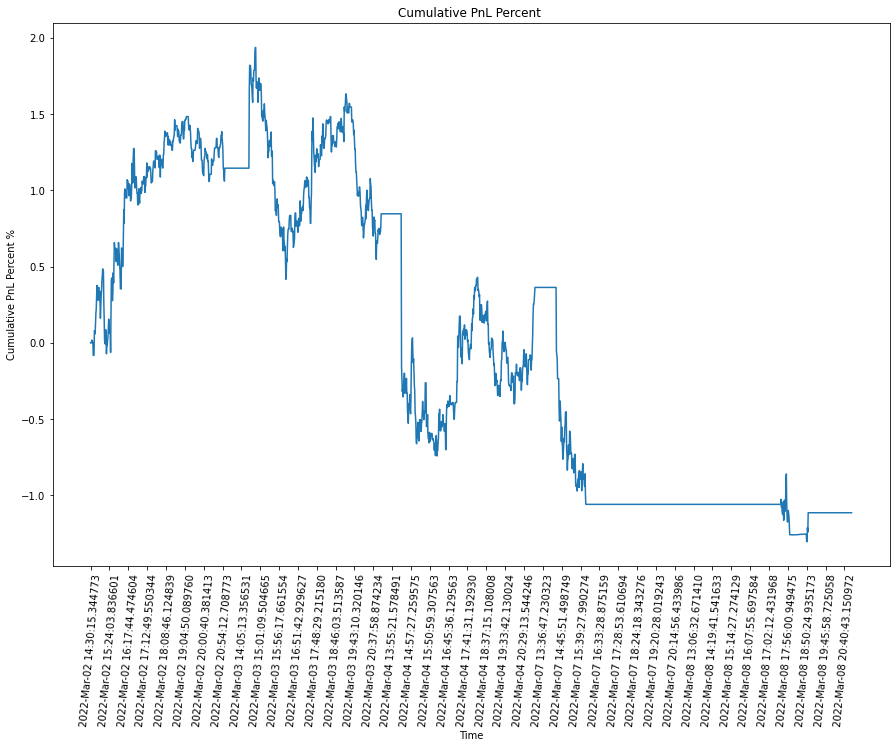

cumulative pnl percentage: -1.1141%
standard deviation: 0.9856
downside standard deviation: 0.3548
sharpe ratio: -1.1303
sortino ratio: -3.14
max drawdown: -1.673%


In [19]:
file = "backtest-data/BACK_TestInstance_2022-12-10_184519_start_03-02-2022_end_03-08-2022_pnl.csv"
strategy_statistic(file , initial_value = 1000000)